<a href="https://colab.research.google.com/github/Nacoor/Homeworks/blob/main/%22Classification_OSDA_Oorzhak_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/EgorDudyrev/OSDA_course
%cd OSDA_course/lazy_fca
import lazy_pipeline as lpipe


Cloning into 'OSDA_course'...
remote: Enumerating objects: 512, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 512 (delta 28), reused 46 (delta 20), pack-reused 451
Receiving objects: 100% (512/512), 5.65 MiB | 4.77 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/OSDA_course/lazy_fca


In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving smoking.csv to smoking.csv


In [66]:
df = pd.read_csv('smoking.csv')
df = df.loc[1:1000]
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [67]:
df = df.drop(columns = ["ID", "waist(cm)", "relaxation", 'triglyceride', "Gtp", 'AST', 'ALT', 'eyesight(left)', 'hearing(left)', 'oral'])

In [68]:
df

,gender,age,height(cm),weight(kg),eyesight(right),hearing(right),systolic,fasting blood sugar,Cholesterol,HDL,LDL,hemoglobin,Urine protein,serum creatinine,dental caries,tartar,smoking
1,F,40,160,60,0.6,1.0,119.0,130.0,192.0,42.0,127.0,12.7,1.0,0.6,0,Y,0
2,M,55,170,60,0.8,1.0,138.0,89.0,242.0,55.0,151.0,15.8,1.0,1.0,0,N,1
3,M,40,165,70,1.5,1.0,100.0,96.0,322.0,45.0,226.0,14.7,1.0,1.0,0,Y,0
4,F,40,155,60,1.0,1.0,120.0,80.0,184.0,62.0,107.0,12.5,1.0,0.6,0,N,0
5,M,30,180,75,1.2,1.0,128.0,95.0,217.0,48.0,129.0,16.2,1.0,1.2,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,M,50,175,70,1.2,1.0,122.0,87.0,187.0,60.0,111.0,13.2,1.0,0.8,0,Y,0
997,M,40,175,80,1.5,1.0,127.0,91.0,240.0,58.0,164.0,14.9,1.0,1.0,0,Y,0
998,M,30,165,80,1.2,1.0,112.0,104.0,211.0,62.0,132.0,15.6,1.0,0.8,1,Y,1
999,F,60,155,60,0.7,1.0,128.0,97.0,256.0,60.0,164.0,13.5,1.0,0.8,1,Y,0


In [69]:
df["age"].describe()

count    1000.000000
mean       44.365000
std        11.803012
min        20.000000
25%        40.000000
50%        40.000000
75%        55.000000
max        80.000000
Name: age, dtype: float64

In [70]:
bins1 = [0, 25, 30, 35, 40, 50, 60, 80]
labels1 = ['1', '2', '3', '4', '5', '6', '7']
df['age1'] = pd.cut(x = df['age'], bins = bins1, labels = labels1, include_lowest = True)


In [71]:
df["height(cm)"].describe()

count    1000.000000
mean      164.430000
std         9.508707
min       140.000000
25%       155.000000
50%       165.000000
75%       170.000000
max       190.000000
Name: height(cm), dtype: float64

In [72]:
bins2 = [0, 150, 160, 170, 180, 190]
labels2 = ['1', '2', '3', '4', '5']
df['height'] = pd.cut(x = df['height(cm)'], bins = bins2, labels = labels2, include_lowest = True)
df

,gender,age,height(cm),weight(kg),eyesight(right),hearing(right),systolic,fasting blood sugar,Cholesterol,HDL,LDL,hemoglobin,Urine protein,serum creatinine,dental caries,tartar,smoking,age1,height
1,F,40,160,60,0.6,1.0,119.0,130.0,192.0,42.0,127.0,12.7,1.0,0.6,0,Y,0,4,2
2,M,55,170,60,0.8,1.0,138.0,89.0,242.0,55.0,151.0,15.8,1.0,1.0,0,N,1,6,3
3,M,40,165,70,1.5,1.0,100.0,96.0,322.0,45.0,226.0,14.7,1.0,1.0,0,Y,0,4,3
4,F,40,155,60,1.0,1.0,120.0,80.0,184.0,62.0,107.0,12.5,1.0,0.6,0,N,0,4,2
5,M,30,180,75,1.2,1.0,128.0,95.0,217.0,48.0,129.0,16.2,1.0,1.2,0,Y,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,M,50,175,70,1.2,1.0,122.0,87.0,187.0,60.0,111.0,13.2,1.0,0.8,0,Y,0,5,4
997,M,40,175,80,1.5,1.0,127.0,91.0,240.0,58.0,164.0,14.9,1.0,1.0,0,Y,0,4,4
998,M,30,165,80,1.2,1.0,112.0,104.0,211.0,62.0,132.0,15.6,1.0,0.8,1,Y,1,2,3
999,F,60,155,60,0.7,1.0,128.0,97.0,256.0,60.0,164.0,13.5,1.0,0.8,1,Y,0,6,2


In [73]:
df["weight(kg)"].describe()

count    1000.000000
mean       65.895000
std        12.825306
min        35.000000
25%        55.000000
50%        65.000000
75%        75.000000
max       120.000000
Name: weight(kg), dtype: float64

In [74]:
bins3 = [0, 40, 50, 60, 70, 80, 90, 100, 120]
labels3 = ['1', '2', '3', '4', '5', '6', '7', '8']
df['weight'] = pd.cut(x = df['weight(kg)'], bins = bins3, labels = labels3, include_lowest = True)

In [75]:
df["eyesight(right)"].describe()

count    1000.000000
mean        1.000800
std         0.436406
min         0.100000
25%         0.800000
50%         1.000000
75%         1.200000
max         9.900000
Name: eyesight(right), dtype: float64

In [76]:
bins4 = [0, 0.5, 0.75, 1, 1.25, 1.5, 2, 3, 10]
labels4 = ['1', '2', '3', '4', '5', '6', '7', '8']
df['eyesight'] = pd.cut(x = df['eyesight(right)'], bins = bins4, labels = labels4, include_lowest = True)

In [77]:
df = df.drop(columns = "hearing(right)")

In [78]:
df["systolic"].describe()

count    1000.000000
mean      121.187000
std        13.256688
min        84.000000
25%       111.000000
50%       120.000000
75%       130.000000
max       167.000000
Name: systolic, dtype: float64

In [79]:
bins5 = [0, 85, 100, 120, 130, 140, 150, 168]
labels5 = ['1', '2', '3', '4', '5', '6', '7']
df['systolic1'] = pd.cut(x = df['systolic'], bins = bins5, labels = labels5, include_lowest = True)

In [80]:
df["fasting blood sugar"].describe()

count    1000.000000
mean       98.512000
std        21.047348
min        69.000000
25%        89.000000
50%        95.000000
75%       103.000000
max       423.000000
Name: fasting blood sugar, dtype: float64

In [81]:
bins6 = [0, 75, 90, 95, 105, 140, 180, 250, 350, 450]
labels6 = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
df['fasting blood sugar1'] = pd.cut(x = df['fasting blood sugar'], bins = bins6, labels = labels6, include_lowest = True)

In [82]:
df["Cholesterol"].describe()

count    1000.000000
mean      198.972000
std        36.602445
min        96.000000
25%       175.000000
50%       198.000000
75%       224.000000
max       373.000000
Name: Cholesterol, dtype: float64

In [83]:
bins7 = [0, 120, 175, 200, 230, 270, 310, 380]
labels7 = ['1', '2', '3', '4', '5', '6', '7']
df['Cholesterol1'] = pd.cut(x = df['Cholesterol'], bins = bins7, labels = labels7, include_lowest = True)

In [84]:
df["HDL"].describe()

count    1000.000000
mean       57.481000
std        14.633174
min        29.000000
25%        46.000000
50%        56.000000
75%        66.000000
max       113.000000
Name: HDL, dtype: float64

In [85]:
bins8 = [0, 35, 47, 57, 67, 80, 100, 115]
labels8 = ['1', '2', '3', '4', '5', '6', '7']
df['HDL1'] = pd.cut(x = df['HDL'], bins = bins8, labels = labels8, include_lowest = True)

In [86]:
df["LDL"].describe()

count    1000.000000
mean      116.675000
std        32.875556
min        24.000000
25%        95.750000
50%       116.000000
75%       137.000000
max       272.000000
Name: LDL, dtype: float64

In [87]:
bins9 = [0, 50, 96, 117, 138, 170, 220, 275]
labels9 = ['1', '2', '3', '4', '5', '6', '7']
df['LDL1'] = pd.cut(x = df['LDL'], bins = bins9, labels = labels9, include_lowest = True)

In [88]:
df["hemoglobin"].describe()

count    1000.000000
mean       14.612000
std         1.562638
min         7.900000
25%        13.500000
50%        14.800000
75%        15.800000
max        18.800000
Name: hemoglobin, dtype: float64

In [89]:
bins10 = [0, 9, 14, 15, 16, 17, 18, 19]
labels10 = ['1', '2', '3', '4', '5', '6', '7']
df['hemoglobin1'] = pd.cut(x = df['hemoglobin'], bins = bins10, labels = labels10, include_lowest = True)

In [90]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'eyesight(right)',
       'systolic', 'fasting blood sugar', 'Cholesterol', 'HDL', 'LDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'dental caries',
       'tartar', 'smoking', 'age1', 'height', 'weight', 'eyesight',
       'systolic1', 'fasting blood sugar1', 'Cholesterol1', 'HDL1', 'LDL1',
       'hemoglobin1'],
      dtype='object')

In [91]:
df = df.drop(columns = ["age", 'height(cm)', 'weight(kg)', 'eyesight(right)', 'systolic', 'fasting blood sugar', 'Cholesterol', 'HDL', 'LDL', 'hemoglobin'])

In [92]:
df

,gender,Urine protein,serum creatinine,dental caries,tartar,smoking,age1,height,weight,eyesight,systolic1,fasting blood sugar1,Cholesterol1,HDL1,LDL1,hemoglobin1
1,F,1.0,0.6,0,Y,0,4,2,3,2,3,5,3,2,4,2
2,M,1.0,1.0,0,N,1,6,3,3,3,5,2,5,3,5,4
3,M,1.0,1.0,0,Y,0,4,3,4,5,2,4,7,2,7,3
4,F,1.0,0.6,0,N,0,4,2,3,3,3,2,3,4,3,2
5,M,1.0,1.2,0,Y,0,2,4,5,4,4,3,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,M,1.0,0.8,0,Y,0,5,4,4,4,4,2,3,4,3,2
997,M,1.0,1.0,0,Y,0,4,4,5,5,4,3,5,4,5,3
998,M,1.0,0.8,1,Y,1,2,3,5,4,3,4,4,4,4,4
999,F,1.0,0.8,1,Y,0,6,2,3,2,4,4,5,4,5,2


In [93]:
df = df.dropna()
df

,gender,Urine protein,serum creatinine,dental caries,tartar,smoking,age1,height,weight,eyesight,systolic1,fasting blood sugar1,Cholesterol1,HDL1,LDL1,hemoglobin1
1,F,1.0,0.6,0,Y,0,4,2,3,2,3,5,3,2,4,2
2,M,1.0,1.0,0,N,1,6,3,3,3,5,2,5,3,5,4
3,M,1.0,1.0,0,Y,0,4,3,4,5,2,4,7,2,7,3
4,F,1.0,0.6,0,N,0,4,2,3,3,3,2,3,4,3,2
5,M,1.0,1.2,0,Y,0,2,4,5,4,4,3,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,M,1.0,0.8,0,Y,0,5,4,4,4,4,2,3,4,3,2
997,M,1.0,1.0,0,Y,0,4,4,5,5,4,3,5,4,5,3
998,M,1.0,0.8,1,Y,1,2,3,5,4,3,4,4,4,4,4
999,F,1.0,0.8,1,Y,0,6,2,3,2,4,4,5,4,5,2


In [94]:
df["smoking"] = df["smoking"].apply(lambda row: True if row == 1 else False)

In [95]:
df

,gender,Urine protein,serum creatinine,dental caries,tartar,smoking,age1,height,weight,eyesight,systolic1,fasting blood sugar1,Cholesterol1,HDL1,LDL1,hemoglobin1
1,F,1.0,0.6,0,Y,False,4,2,3,2,3,5,3,2,4,2
2,M,1.0,1.0,0,N,True,6,3,3,3,5,2,5,3,5,4
3,M,1.0,1.0,0,Y,False,4,3,4,5,2,4,7,2,7,3
4,F,1.0,0.6,0,N,False,4,2,3,3,3,2,3,4,3,2
5,M,1.0,1.2,0,Y,False,2,4,5,4,4,3,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,M,1.0,0.8,0,Y,False,5,4,4,4,4,2,3,4,3,2
997,M,1.0,1.0,0,Y,False,4,4,5,5,4,3,5,4,5,3
998,M,1.0,0.8,1,Y,True,2,3,5,4,3,4,4,4,4,4
999,F,1.0,0.8,1,Y,False,6,2,3,2,4,4,5,4,5,2


In [96]:

y_name = 'smoking'
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()


(1000, 99)


,gender: F,gender: M,Urine protein: 1.0,Urine protein: 2.0,Urine protein: 3.0,Urine protein: 4.0,Urine protein: 5.0,serum creatinine: 0.1,serum creatinine: 0.4,serum creatinine: 0.5,...,LDL1: 5,LDL1: 6,LDL1: 7,hemoglobin1: 1,hemoglobin1: 2,hemoglobin1: 3,hemoglobin1: 4,hemoglobin1: 5,hemoglobin1: 6,hemoglobin1: 7
1,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [97]:
X = X.sample(frac=1, random_state=42)
y = y[X.index] 

In [98]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'Cholesterol1: 5',
 'HDL1: 5',
 'LDL1: 5',
 'Urine protein: 1.0',
 'age1: 1',
 'dental caries: 0',
 'eyesight: 3',
 'fasting blood sugar1: 3',
 'gender: M',
 'height: 4',
 'hemoglobin1: 4',
 'serum creatinine: 1.2',
 'systolic1: 3',
 'tartar: Y',
 'weight: 5'}

In [99]:
y = y.values.tolist()


In [100]:
n_train = int(len(X)*0.2)
n_test = len(X) - n_train
n_train, n_test


(200, 800)

In [101]:
y_test = y[n_train:]


MAKE PREDICTIONS

In [102]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)


Predicting step by step: 100%|██████████| 1000/1000 [00:42<00:00, 18.86it/s]

CPU times: user 42.1 s, sys: 132 ms, total: 42.2 s
Wall time: 42.4 s


In [103]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 1000/1000 [00:04<00:00, 174.04it/s]

CPU times: user 4.54 s, sys: 30 ms, total: 4.57 s
Wall time: 4.6 s


In [104]:

from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_cl

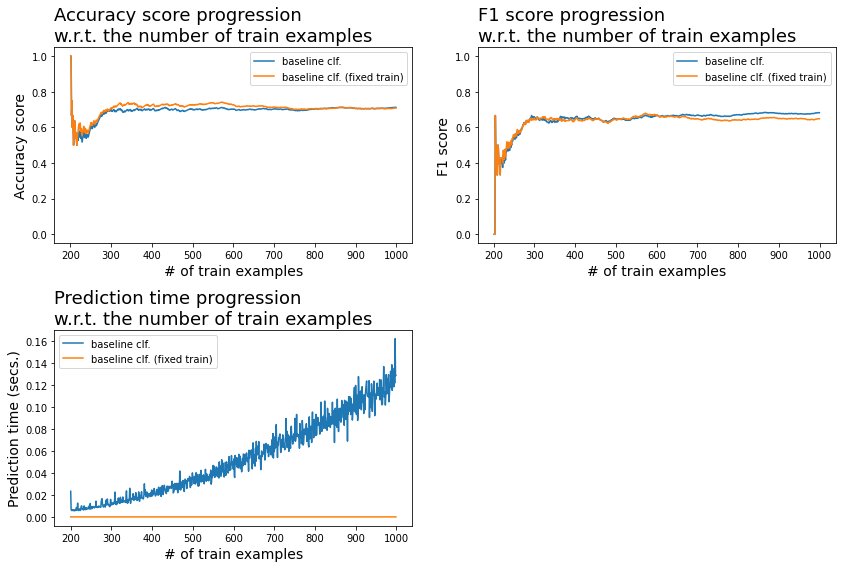

In [106]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1) 


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), size=14)
    ax.legend()
    
axs[1,1].set_axis_off()    

plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()


I have chosen the dataset that contains basic biological signal data and the goal was to determine whether a person smokes or not based on the medical data.

The dataset contains numbers and categories.

The scaling was implemented based on the information that I got using .describe() method. I took into consideration min, mean, max, std and all percentiles

As far as the prediction quality is concerned, the accuracy score is around 0.7.

